# Feature Generation

## Heart Failure Dataset

### Imports and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, SMOTE
import csv
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

y = data.pop('DEATH_EVENT')
X = data

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


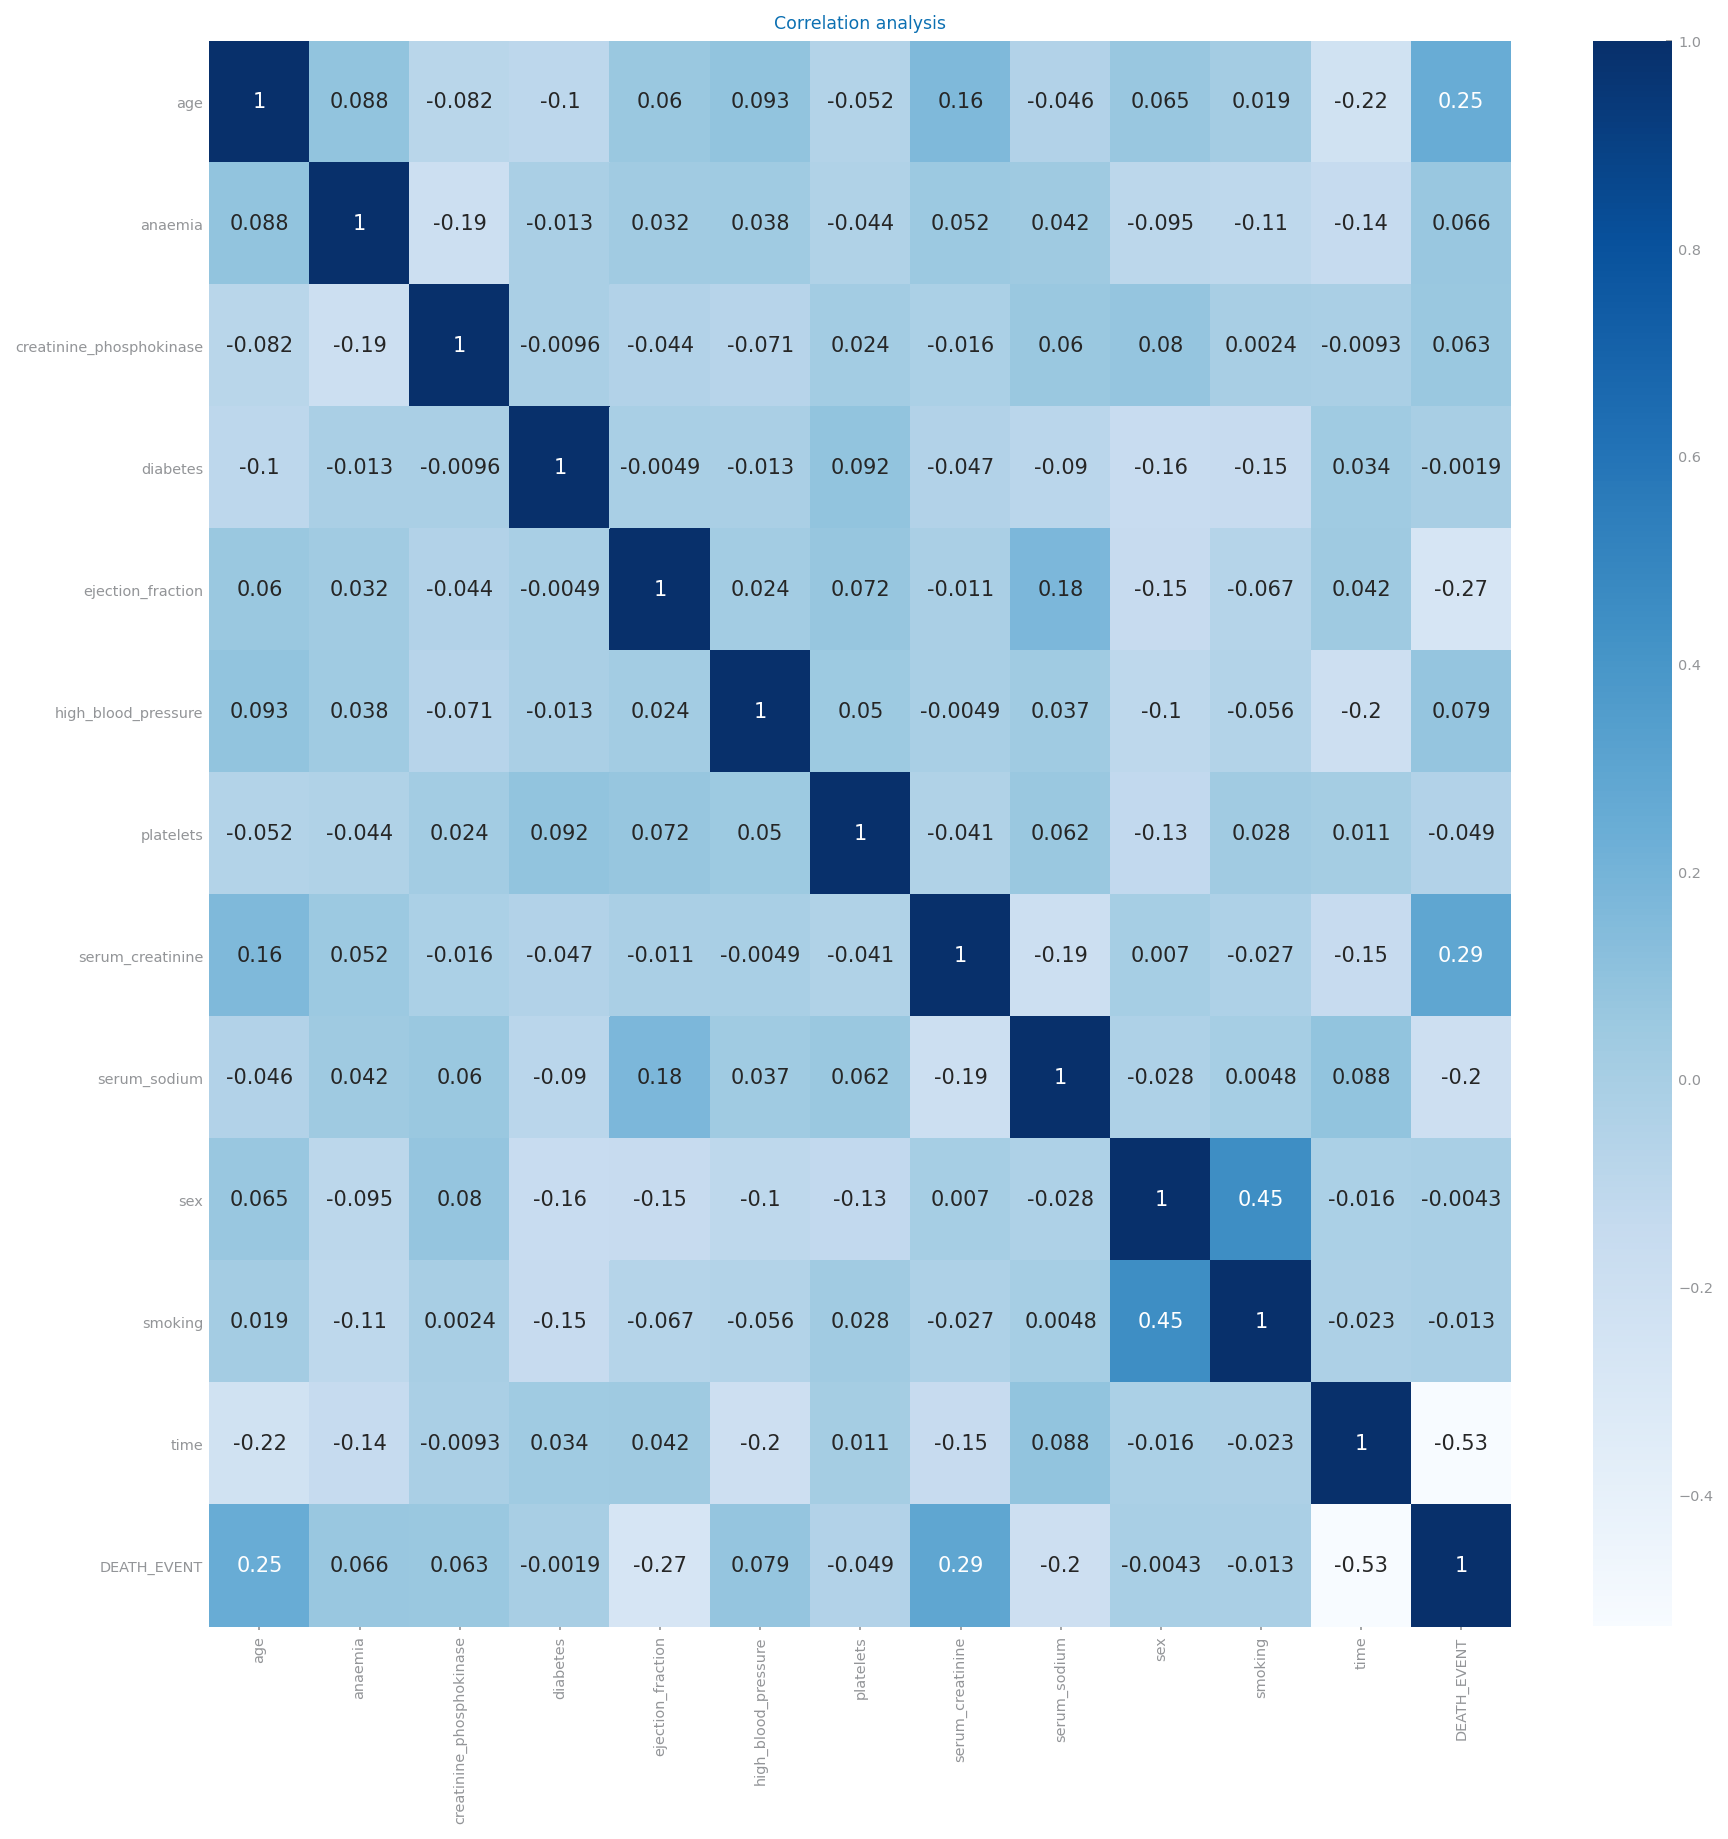

In [32]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

fig = plt.figure(figsize=[14,14])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

We noticed, when doing feature selection, that most of our methodologies for removing features would discard the features **diabetes**, **high_blood_pressure**, **anaemia** and **smoking**. These variables on their own seem to have little impact on the mortality of a heart attack, however they still do correspond to an elevated risk of mortality and simply dismissing seemed like we would be losing possibly important information.

As such we decided to create a new variable - **elevated_risk**. This categorical variable is set to True when a minimum of 3 out of 4 of those factors are true. We hope that with this new variable we can still weight in the influence of these variables, not individually, but with their accumulated risk.

### Creation of the elevated_risk column

In [3]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

anaemia = data.pop('anaemia')
high_blood_pressure = data.pop('high_blood_pressure')
smoking = data.pop('smoking')
diabetes = data.pop('diabetes')


# put all selection together
df = pd.DataFrame({'Anaemia':anaemia, 'High B. P.':high_blood_pressure, 'Smoking':smoking, 'Diabetes': diabetes})

# count the selected times for each feature
df['Elevated Risk'] = [1 if n>=3 else 0 for n in np.sum(df, axis=1)]

df.index = range(1, len(df)+1)
df.head(50)

,Anaemia,High B. P.,Smoking,Diabetes,Elevated Risk
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0
5,1,0,0,1,0
6,1,1,1,0,1
7,1,0,0,0,0
8,1,0,1,1,1
9,0,0,0,0,0
10,1,1,1,0,1


In [4]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_generation/HR_extra.csv', index=False)
data.head(50)

,elevated_risk,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,0,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,0,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,0,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,0,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,1,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,0,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,1,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,0,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,1,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


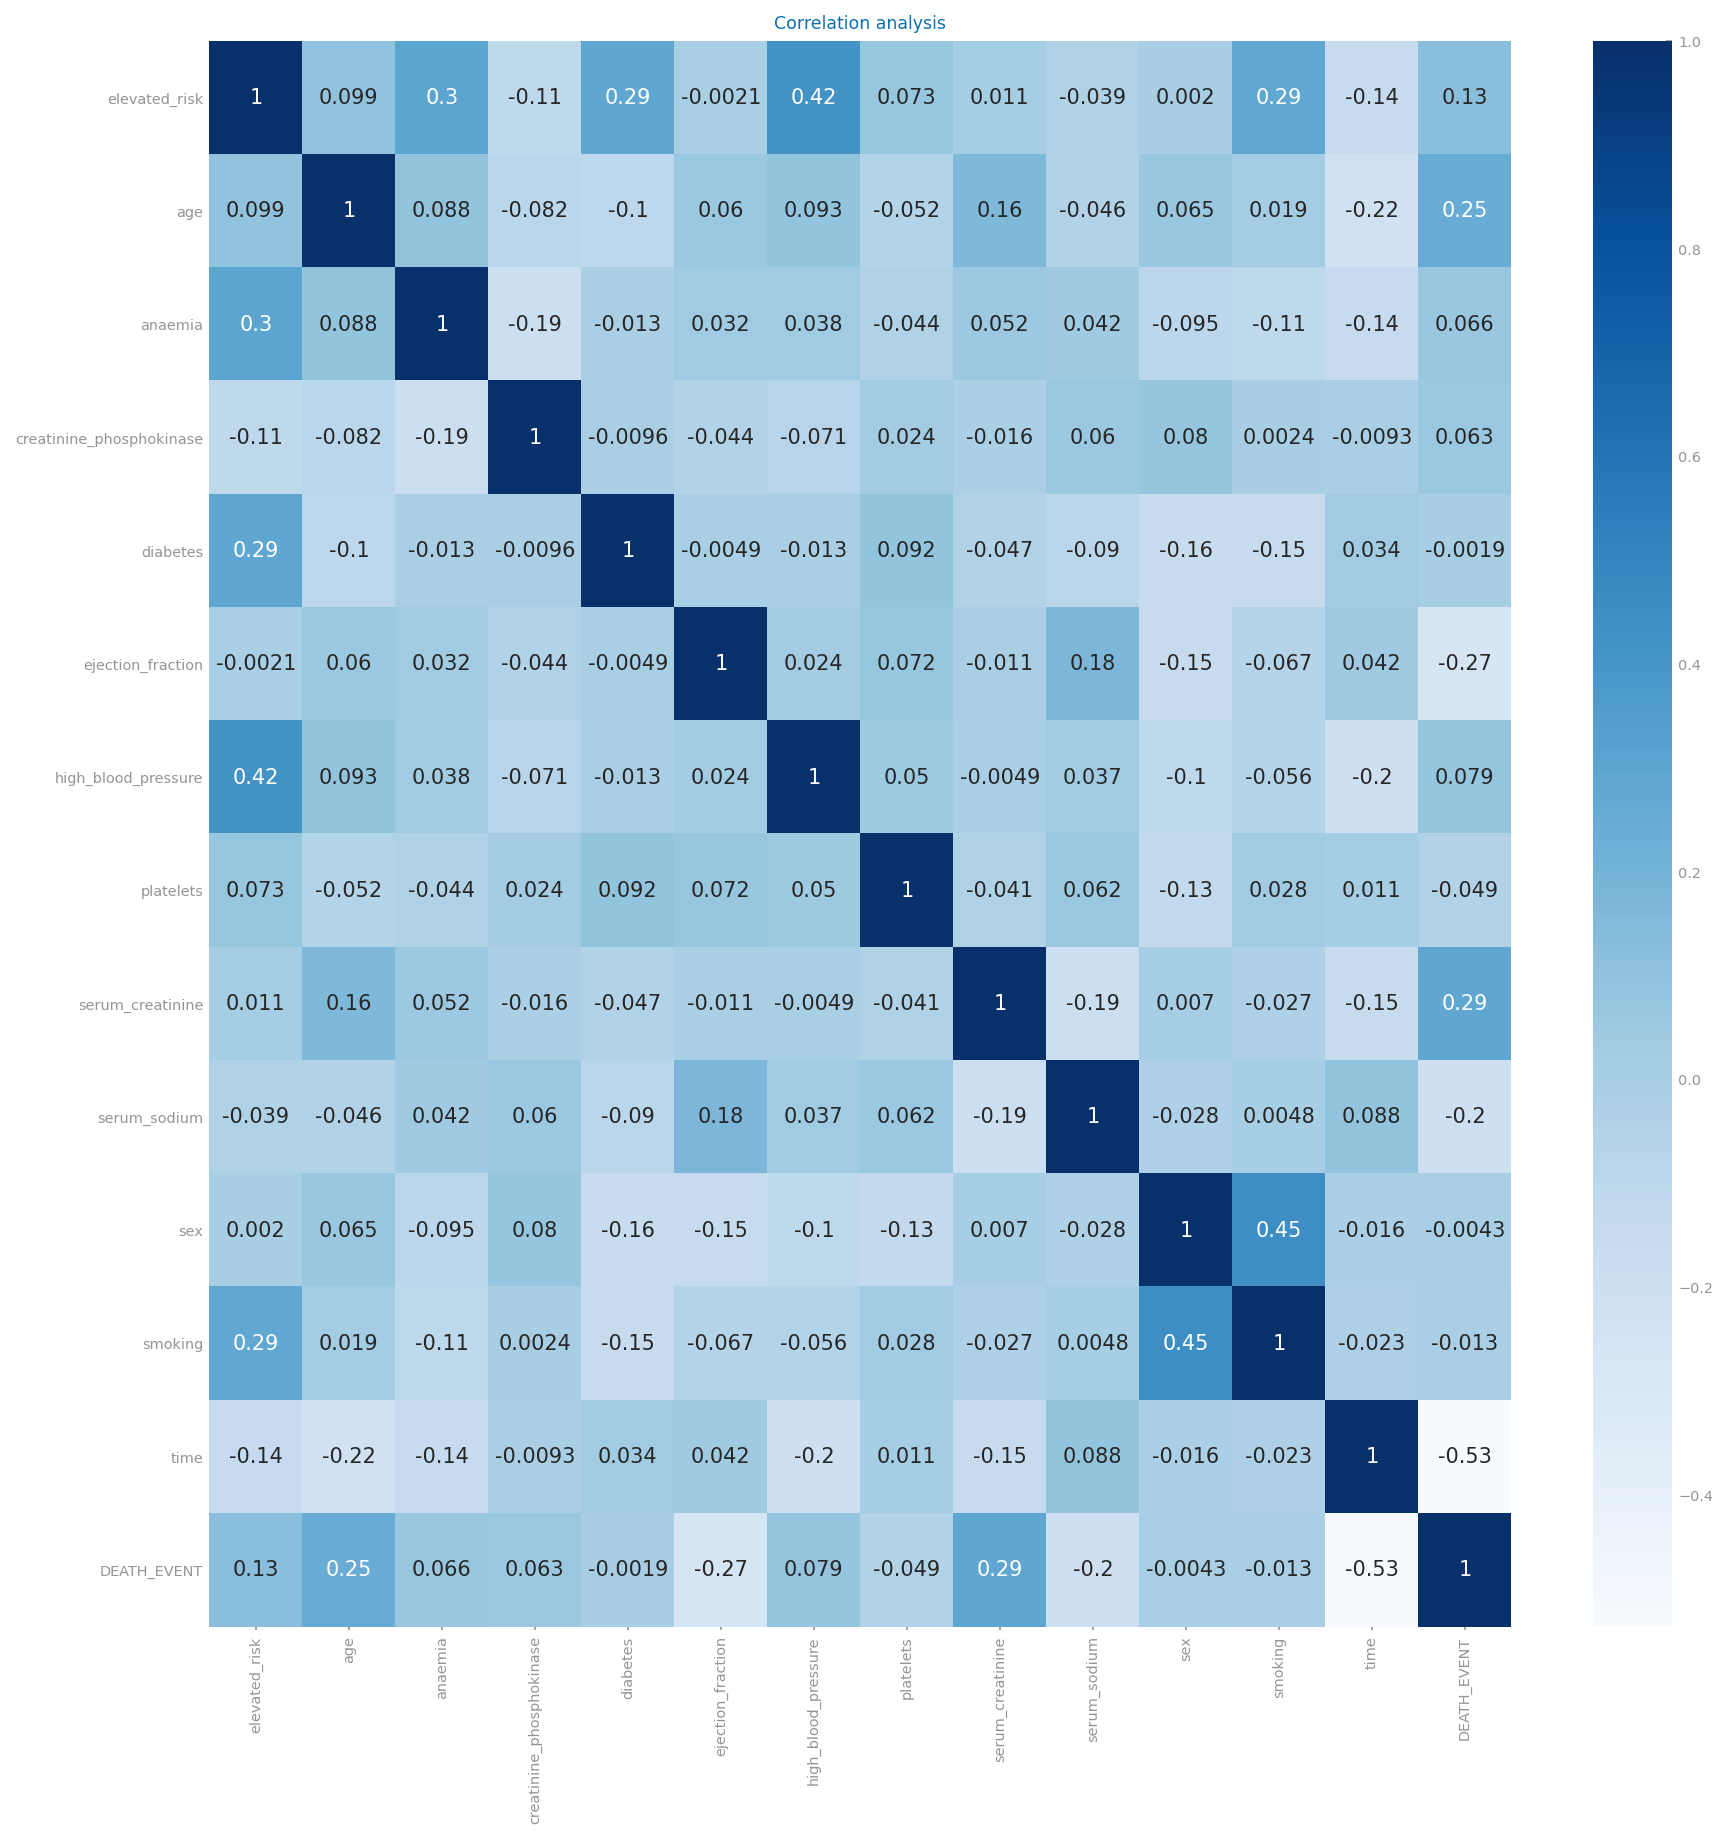

In [31]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_generation/HR_extra.csv')

fig = plt.figure(figsize=[14,14])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

### Scaling new dataset

Since our new variable is binary, all we have to do is append it to the scaled datasets

In [5]:
data = pd.read_csv('../datasets/hf_scaled/HF_normalized.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_generation/HR_normalized_extra.csv', index=False)
data.head(50)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0,1
1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0,1
2,0,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0,1
4,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0,1
5,1,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1,0,1,1,1,1
6,0,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1,0,0,1,0,1
7,1,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1,1,0,1,1,1
8,0,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,0,0,0,0,0,1
9,1,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1,0,1,1,1,1


In [6]:
data = pd.read_csv('../datasets/hf_scaled/HF_standardized.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_generation/HR_standardized_extra.csv', index=False)
data.head(50)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,0,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,0,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1
5,1,2.456114,-0.552141,0.162199,-6.079240e-01,0.683709,-1.050016,-1.577879,1,0,1,1,1,1
6,0,1.192945,-0.346704,-1.953749,-1.396531e+00,-0.187726,0.085034,-1.552067,1,0,0,1,0,1
7,1,-0.070223,-0.275472,1.854958,1.952488e+00,-0.284552,-1.277026,-1.552067,1,1,0,1,1,1
8,0,0.350833,-0.438583,2.278147,7.535660e-09,0.102752,0.312044,-1.552067,0,0,0,0,0,1
9,1,1.614001,-0.473683,-0.260991,1.276539e+00,7.752020,-0.823006,-1.552067,1,0,1,1,1,1


<br/>
<br/>
<br/>
<br/>
<br/>

### Feature Selection after adding new feature

### HR_Extra

### Univariate Selection
"Statistical tests can be used to select those features that have the strongest relationship with the output variable." - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. - https://scikit-learn.org/stable/modules/feature_selection.html

#### Pearson/Point-Biserial Correlation - Filter
"We check the absolute value of the **Pearson’s** correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [7]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_pearson.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_pearson.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,diabetes,serum_sodium,time,DEATH_EVENT
0,0,75.0,582,0,130,4,1
1,0,55.0,7861,0,136,6,1
2,0,65.0,146,0,129,7,1
3,0,50.0,111,0,137,7,1
4,0,65.0,160,1,116,8,1
5,1,90.0,47,0,132,8,1
6,0,75.0,246,0,137,10,1
7,1,60.0,315,1,131,10,1
8,0,65.0,157,0,138,10,1
9,1,80.0,123,0,133,10,1


#### ANOVA 
ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [8]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_anova.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_anova.csv', index=False)
data.head(10)

,elevated_risk,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,0,75.0,0,582,20,1,265000.00,1.9,130,0,4,1
1,0,55.0,0,7861,38,0,263358.03,1.1,136,0,6,1
2,0,65.0,0,146,20,0,162000.00,1.3,129,1,7,1
3,0,50.0,1,111,20,0,210000.00,1.9,137,0,7,1
4,0,65.0,1,160,20,0,327000.00,2.7,116,0,8,1
5,1,90.0,1,47,40,1,204000.00,2.1,132,1,8,1
6,0,75.0,1,246,15,0,127000.00,1.2,137,0,10,1
7,1,60.0,1,315,60,0,454000.00,1.1,131,1,10,1
8,0,65.0,0,157,65,0,263358.03,1.5,138,0,10,1
9,1,80.0,1,123,35,1,388000.00,9.4,133,1,10,1


#### Chi-Squared - Filter
"We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [9]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_chi.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_chi.csv', index=False)
data.head(10)

,elevated_risk,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,0,75.0,0,582,20,1,265000.00,1.9,130,0,4,1
1,0,55.0,0,7861,38,0,263358.03,1.1,136,0,6,1
2,0,65.0,0,146,20,0,162000.00,1.3,129,1,7,1
3,0,50.0,1,111,20,0,210000.00,1.9,137,0,7,1
4,0,65.0,1,160,20,0,327000.00,2.7,116,0,8,1
5,1,90.0,1,47,40,1,204000.00,2.1,132,1,8,1
6,0,75.0,1,246,15,0,127000.00,1.2,137,0,10,1
7,1,60.0,1,315,60,0,454000.00,1.1,131,1,10,1
8,0,65.0,0,157,65,0,263358.03,1.5,138,0,10,1
9,1,80.0,1,123,35,1,388000.00,9.4,133,1,10,1


#### Recursive Feature Elimination (WIth SVR) - Wrapper
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

In [10]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_rfe.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_rfe.csv', index=False)
data.head(10)

,elevated_risk,anaemia,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0,0,1,1.9,130,1,0,1
1,0,0,0,1.1,136,1,0,1
2,0,0,0,1.3,129,1,1,1
3,0,1,0,1.9,137,1,0,1
4,0,1,0,2.7,116,0,0,1
5,1,1,1,2.1,132,1,1,1
6,0,1,0,1.2,137,1,0,1
7,1,1,0,1.1,131,1,1,1
8,0,0,0,1.5,138,0,0,1
9,1,1,1,9.4,133,1,1,1


#### Lasso
Allegedly really good for when you have both categorical and numeric features - https://datascience.stackexchange.com/questions/68792/feature-selection-for-data-with-both-continuous-and-categorical-features

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.

For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.

In [11]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_lasso.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_lasso.csv', index=False)
data.head(10)

,elevated_risk,age,time,DEATH_EVENT
0,0,75.0,4,1
1,0,55.0,6,1
2,0,65.0,7,1
3,0,50.0,7,1
4,0,65.0,8,1
5,1,90.0,8,1
6,0,75.0,10,1
7,1,60.0,10,1
8,0,65.0,10,1
9,1,80.0,10,1


#### Mixing

In [12]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_mixed.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_extra_mixed.csv', index=False)
data.head(10)

,elevated_risk,age,serum_sodium,time,DEATH_EVENT
0,0,75.0,130,4,1
1,0,55.0,136,6,1
2,0,65.0,129,7,1
3,0,50.0,137,7,1
4,0,65.0,116,8,1
5,1,90.0,132,8,1
6,0,75.0,137,10,1
7,1,60.0,131,10,1
8,0,65.0,138,10,1
9,1,80.0,133,10,1


### Feature Importance
"Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable."

"Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset."

-https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [13]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/importance/HR_extraTreeClassifier.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/importance/HR_extra_extraTreeClassifier.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,75.0,582,20,265000.00,1.9,130,4,1
1,0,55.0,7861,38,263358.03,1.1,136,6,1
2,0,65.0,146,20,162000.00,1.3,129,7,1
3,0,50.0,111,20,210000.00,1.9,137,7,1
4,0,65.0,160,20,327000.00,2.7,116,8,1
5,1,90.0,47,40,204000.00,2.1,132,8,1
6,0,75.0,246,15,127000.00,1.2,137,10,1
7,1,60.0,315,60,454000.00,1.1,131,10,1
8,0,65.0,157,65,263358.03,1.5,138,10,1
9,1,80.0,123,35,388000.00,9.4,133,10,1


### Correlation Matrix

In [14]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/correlation/HR_corr.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/correlation/HR_extra_corr.csv', index=False)
data.head(10)

,elevated_risk,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,0,75.0,0,582,20,1,265000.00,1.9,130,0,4,1
1,0,55.0,0,7861,38,0,263358.03,1.1,136,0,6,1
2,0,65.0,0,146,20,0,162000.00,1.3,129,1,7,1
3,0,50.0,1,111,20,0,210000.00,1.9,137,0,7,1
4,0,65.0,1,160,20,0,327000.00,2.7,116,0,8,1
5,1,90.0,1,47,40,1,204000.00,2.1,132,1,8,1
6,0,75.0,1,246,15,0,127000.00,1.2,137,0,10,1
7,1,60.0,1,315,60,0,454000.00,1.1,131,1,10,1
8,0,65.0,0,157,65,0,263358.03,1.5,138,0,10,1
9,1,80.0,1,123,35,1,388000.00,9.4,133,1,10,1


### HR_Normalized

### Univariate Selection
"Statistical tests can be used to select those features that have the strongest relationship with the output variable." - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. - https://scikit-learn.org/stable/modules/feature_selection.html

#### Pearson/Point-Biserial Correlation - Filter
"We check the absolute value of the **Pearson’s** correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [15]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_pearson.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_pearson.csv', index=False)
data.head(10)

,elevated_risk,creatinine_phosphokinase,anaemia,diabetes,high_blood_pressure,smoking,DEATH_EVENT
0,0,0.071319,0,0,1,0,1
1,0,1.000000,0,0,0,0,1
2,0,0.015693,0,0,0,1,1
3,0,0.011227,1,0,0,0,1
4,0,0.017479,1,1,0,0,1
5,1,0.003062,1,0,1,1,1
6,0,0.028451,1,0,0,0,1
7,1,0.037254,1,1,0,1,1
8,0,0.017096,0,0,0,0,1
9,1,0.012758,1,0,1,1,1


#### ANOVA 
ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [16]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_anova.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_anova.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,1,0,1
1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1
2,0,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,1,1
3,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1
4,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,0,0,1
5,1,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1,1,1,1
6,0,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1,0,0,1
7,1,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1,0,1,1
8,0,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,0,0,0,1
9,1,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1,1,1,1


#### Chi-Squared - Filter
"We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [17]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_chi.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_chi.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,1,0,1
1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1
2,0,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,1,1
3,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1
4,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,0,0,1
5,1,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1,1,1,1
6,0,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1,0,0,1
7,1,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1,0,1,1
8,0,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,0,0,0,1
9,1,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1,1,1,1


#### Recursive Feature Elimination (WIth SVR) - Wrapper
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

In [18]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_rfe.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_rfe.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.157303,0.485714,0.000000,1
1,0,0.272727,1.000000,0.363636,0.067416,0.657143,0.007117,1
2,0,0.454545,0.015693,0.090909,0.089888,0.457143,0.010676,1
3,0,0.181818,0.011227,0.090909,0.157303,0.685714,0.010676,1
4,0,0.454545,0.017479,0.090909,0.247191,0.085714,0.014235,1
5,1,0.909091,0.003062,0.393939,0.179775,0.542857,0.014235,1
6,0,0.636364,0.028451,0.015152,0.078652,0.685714,0.021352,1
7,1,0.363636,0.037254,0.696970,0.067416,0.514286,0.021352,1
8,0,0.454545,0.017096,0.772727,0.112360,0.714286,0.021352,1
9,1,0.727273,0.012758,0.318182,1.000000,0.571429,0.021352,1


#### Lasso
Allegedly really good for when you have both categorical and numeric features - https://datascience.stackexchange.com/questions/68792/feature-selection-for-data-with-both-continuous-and-categorical-features

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.

For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.

In [19]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_lasso.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_lasso.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.157303,0.000000,1
1,0,0.272727,1.000000,0.363636,0.067416,0.007117,1
2,0,0.454545,0.015693,0.090909,0.089888,0.010676,1
3,0,0.181818,0.011227,0.090909,0.157303,0.010676,1
4,0,0.454545,0.017479,0.090909,0.247191,0.014235,1
5,1,0.909091,0.003062,0.393939,0.179775,0.014235,1
6,0,0.636364,0.028451,0.015152,0.078652,0.021352,1
7,1,0.363636,0.037254,0.696970,0.067416,0.021352,1
8,0,0.454545,0.017096,0.772727,0.112360,0.021352,1
9,1,0.727273,0.012758,0.318182,1.000000,0.021352,1


#### Mixing

In [20]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_mixed.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_normalized_extra_mixed.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.157303,0.000000,1
1,0,0.272727,1.000000,0.363636,0.067416,0.007117,1
2,0,0.454545,0.015693,0.090909,0.089888,0.010676,1
3,0,0.181818,0.011227,0.090909,0.157303,0.010676,1
4,0,0.454545,0.017479,0.090909,0.247191,0.014235,1
5,1,0.909091,0.003062,0.393939,0.179775,0.014235,1
6,0,0.636364,0.028451,0.015152,0.078652,0.021352,1
7,1,0.363636,0.037254,0.696970,0.067416,0.021352,1
8,0,0.454545,0.017096,0.772727,0.112360,0.021352,1
9,1,0.727273,0.012758,0.318182,1.000000,0.021352,1


### Feature Importance
"Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable."

"Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset."

-https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [21]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/importance/HR_normalized_extraTreeClassifier.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/importance/HR_normalized_extra_extraTreeClassifier.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,1
1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,1
2,0,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,1
3,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1
4,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1
5,1,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1
6,0,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1
7,1,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1
8,0,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,1
9,1,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1


### Correlation Matrix

In [22]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/correlation/HR_normalized_corr.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/correlation/HR_normalized_extra_corr.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking,DEATH_EVENT
0,0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,1,0,1
1,0,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1
2,0,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,1,1
3,0,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1
4,0,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,0,0,1
5,1,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1,1,1,1
6,0,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1,0,0,1
7,1,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1,0,1,1
8,0,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,0,0,0,1
9,1,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1,1,1,1


### HR_Standardized

### Univariate Selection
"Statistical tests can be used to select those features that have the strongest relationship with the output variable." - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. - https://scikit-learn.org/stable/modules/feature_selection.html

#### Pearson/Point-Biserial Correlation - Filter
"We check the absolute value of the **Pearson’s** correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [23]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_pearson.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_extra_pearson.csv', index=False)
data.head(10)

,elevated_risk,creatinine_phosphokinase,anaemia,diabetes,high_blood_pressure,smoking,DEATH_EVENT
0,0,0.000166,0,0,1,0,1
1,0,7.514640,0,0,0,0,1
2,0,-0.449939,0,0,0,1,1
3,0,-0.486071,1,0,0,0,1
4,0,-0.435486,1,1,0,0,1
5,1,-0.552141,1,0,1,1,1
6,0,-0.346704,1,0,0,0,1
7,1,-0.275472,1,1,0,1,1
8,0,-0.438583,0,0,0,0,1
9,1,-0.473683,1,0,1,1,1


#### ANOVA 
ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [24]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_anova.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_extra_anova.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,1,0,1
1,0,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1
2,0,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,1,1
3,0,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1
4,0,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,0,0,1
5,1,2.456114,-0.552141,0.162199,-6.079240e-01,0.683709,-1.050016,-1.577879,1,1,1,1
6,0,1.192945,-0.346704,-1.953749,-1.396531e+00,-0.187726,0.085034,-1.552067,1,0,0,1
7,1,-0.070223,-0.275472,1.854958,1.952488e+00,-0.284552,-1.277026,-1.552067,1,0,1,1
8,0,0.350833,-0.438583,2.278147,7.535660e-09,0.102752,0.312044,-1.552067,0,0,0,1
9,1,1.614001,-0.473683,-0.260991,1.276539e+00,7.752020,-0.823006,-1.552067,1,1,1,1


#### Recursive Feature Elimination (WIth SVR) - Wrapper
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

In [25]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_rfe.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_extra_rfe.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time,sex,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,0.490057,-1.629502,1,1
1,0,-0.491279,7.514640,-0.007077,-0.284552,-1.603691,1,1
2,0,0.350833,-0.449939,-1.530560,-0.090900,-1.590785,1,1
3,0,-0.912335,-0.486071,-1.530560,0.490057,-1.590785,1,1
4,0,0.350833,-0.435486,-1.530560,1.264666,-1.577879,0,1
5,1,2.456114,-0.552141,0.162199,0.683709,-1.577879,1,1
6,0,1.192945,-0.346704,-1.953749,-0.187726,-1.552067,1,1
7,1,-0.070223,-0.275472,1.854958,-0.284552,-1.552067,1,1
8,0,0.350833,-0.438583,2.278147,0.102752,-1.552067,0,1
9,1,1.614001,-0.473683,-0.260991,7.752020,-1.552067,1,1


#### Lasso
Allegedly really good for when you have both categorical and numeric features - https://datascience.stackexchange.com/questions/68792/feature-selection-for-data-with-both-continuous-and-categorical-features

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.

For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.

In [26]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_lasso.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_extra_lasso.csv', index=False)
data.head(10)

,elevated_risk,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,0,1.192945,-1.530560,0.490057,-1.629502,1
1,0,-0.491279,-0.007077,-0.284552,-1.603691,1
2,0,0.350833,-1.530560,-0.090900,-1.590785,1
3,0,-0.912335,-1.530560,0.490057,-1.590785,1
4,0,0.350833,-1.530560,1.264666,-1.577879,1
5,1,2.456114,0.162199,0.683709,-1.577879,1
6,0,1.192945,-1.953749,-0.187726,-1.552067,1
7,1,-0.070223,1.854958,-0.284552,-1.552067,1
8,0,0.350833,2.278147,0.102752,-1.552067,1
9,1,1.614001,-0.260991,7.752020,-1.552067,1


#### Mixing

In [27]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_mixed.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/univariate/HR_standardized_extra_mixed.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,0.490057,-1.629502,1
1,0,-0.491279,7.514640,-0.007077,-0.284552,-1.603691,1
2,0,0.350833,-0.449939,-1.530560,-0.090900,-1.590785,1
3,0,-0.912335,-0.486071,-1.530560,0.490057,-1.590785,1
4,0,0.350833,-0.435486,-1.530560,1.264666,-1.577879,1
5,1,2.456114,-0.552141,0.162199,0.683709,-1.577879,1
6,0,1.192945,-0.346704,-1.953749,-0.187726,-1.552067,1
7,1,-0.070223,-0.275472,1.854958,-0.284552,-1.552067,1
8,0,0.350833,-0.438583,2.278147,0.102752,-1.552067,1
9,1,1.614001,-0.473683,-0.260991,7.752020,-1.552067,1


### Feature Importance
"Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable."

"Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset."

-https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [28]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/importance/HR_standardized_extraTreeClassifier.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/importance/HR_standardized_extra_extraTreeClassifier.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1
1,0,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,1
2,0,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,1
3,0,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1
4,0,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1
5,1,2.456114,-0.552141,0.162199,-6.079240e-01,0.683709,-1.050016,-1.577879,1
6,0,1.192945,-0.346704,-1.953749,-1.396531e+00,-0.187726,0.085034,-1.552067,1
7,1,-0.070223,-0.275472,1.854958,1.952488e+00,-0.284552,-1.277026,-1.552067,1
8,0,0.350833,-0.438583,2.278147,7.535660e-09,0.102752,0.312044,-1.552067,1
9,1,1.614001,-0.473683,-0.260991,1.276539e+00,7.752020,-0.823006,-1.552067,1


### Correlation Matrix

In [29]:
data = pd.read_csv('../datasets/hf_feature_engineering/feature_selection/correlation/HR_standardized_corr.csv')

data.insert(0, "elevated_risk", df['Elevated Risk'].values) 

data.to_csv(r'../datasets/hf_feature_engineering/feature_selection/correlation/HR_standardized_extra_corr.csv', index=False)
data.head(10)

,elevated_risk,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,smoking,DEATH_EVENT
0,0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,1,0,1
1,0,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1
2,0,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,1,1
3,0,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1
4,0,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,0,0,1
5,1,2.456114,-0.552141,0.162199,-6.079240e-01,0.683709,-1.050016,-1.577879,1,1,1,1
6,0,1.192945,-0.346704,-1.953749,-1.396531e+00,-0.187726,0.085034,-1.552067,1,0,0,1
7,1,-0.070223,-0.275472,1.854958,1.952488e+00,-0.284552,-1.277026,-1.552067,1,0,1,1
8,0,0.350833,-0.438583,2.278147,7.535660e-09,0.102752,0.312044,-1.552067,0,0,0,1
9,1,1.614001,-0.473683,-0.260991,1.276539e+00,7.752020,-0.823006,-1.552067,1,1,1,1
